Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import load_boston

In [38]:
boston = load_boston()

In [39]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [40]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [82]:
from sklearn.manifold import TSNE

In [47]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


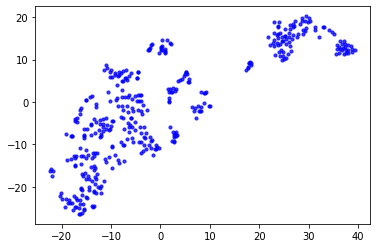

In [51]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s = 10, color = 'blue', alpha = 0.75)
plt.show()

Задание 2. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами. Вычислите средние значения price и CRIM в разных кластерах.

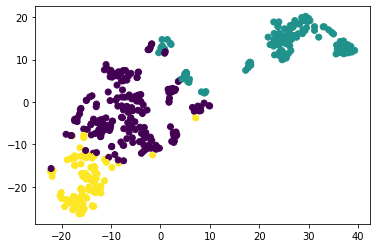

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [75]:
labels_test = kmeans.predict(X_test_scaled)

In [76]:
print(y_train.mean(), X_train.CRIM.mean())

22.796534653465343 3.6091246287128715


In [77]:
print(y_train[labels_train == 0].mean(), X_train[labels_train == 0].CRIM.mean())

24.958115183246072 0.4216602094240837


In [78]:
print(y_train[labels_train == 1].mean(), X_train[labels_train == 1].CRIM.mean())

16.165354330708663 10.797028425196851


In [79]:
print(y_train[labels_train == 2].mean(), X_train[labels_train == 2].CRIM.mean())

27.78837209302326 0.07356558139534884


Задание 3. Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [83]:
tsnet = TSNE(n_components=2, learning_rate=250, random_state=42)

X_test_tsne = tsnet.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


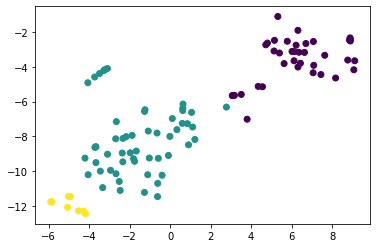

In [84]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42)

labels_train = kmeans.fit_predict(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_train)

plt.show()

In [85]:
labels_test = kmeans.predict(X_test_scaled)

In [87]:
print(y_test.mean(), X_test.CRIM.mean())

21.488235294117644 3.630946764705882


In [88]:
print(y_test[labels_test == 0].mean(), X_test[labels_test == 0].CRIM.mean())

16.710526315789473 9.419181842105264


In [89]:
print(y_test[labels_test == 1].mean(), X_test[labels_test == 1].CRIM.mean())

22.690909090909095 0.2192969090909091


In [90]:
print(y_test[labels_test == 2].mean(), X_test[labels_test == 2].CRIM.mean())

34.3111111111111 0.04070333333333334
